<a href="https://colab.research.google.com/github/GabsLUZ/Trabalho_Final_IA/blob/main/trabalho_final_I_A_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 PREPARAÇÃO DOS DADOS 

In [42]:
!rm -rf /tmp/pip-req-build-2alw22fx

In [ ]:
!pip install git+https://github.com/creditbenchmark/crod-utils.git

In [43]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# pacotes padrao
import os, sys, types, time, datetime, math, random, unidecode, collections, re

# Para nuvem de palavras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Manipulacao de dados
import numpy as np
import pandas as pd

# Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Lidando com Warnings 
import warnings
warnings.filterwarnings('ignore')

# plotagem Inline
%matplotlib inline



In [5]:
df = pd.read_csv("/content/drive/MyDrive/trabalho IA/20230321_Ano2022.csv", sep=';')

In [6]:
print(df.shape)
num_linhas, num_colunas = df.shape
print("DIMENSÕES DO DATAFRAME")
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

(145419, 32)
DIMENSÕES DO DATAFRAME
Número de linhas: 145419
Número de colunas: 32


In [7]:
df.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,IDADE,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,<1,0,TESTE RÁPIDO,03/03/2022,28/02/2022,...,NaN,14/03/2022,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,40,TESTE RÁPIDO,03/03/2022,01/03/2022,...,NaN,15/03/2022,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,40,TESTE RÁPIDO,09/03/2022,09/03/2022,...,NaN,23/03/2022,PARDA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Masculino,30 a 39,38,TESTE RÁPIDO,11/03/2022,09/03/2022,...,NaN,23/03/2022,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Masculino,50 a 59,51,TESTE RÁPIDO,18/02/2022,14/02/2022,...,NaN,28/02/2022,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO


In [8]:
df.describe(include=['O'])

,MUNICIPIO,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
count,145419,145419,145419,145419,145419,145419,145419,145419,1733,145419,...,567,143766,145418,141519,145418,145412,145418,145418,141519,145418
unique,70,20,2,12,8,466,365,431,345,3,...,209,365,6,9,3,6422,2,3,27,1
top,BENTO GONÇALVES,PORTO ALEGRE - R10,Feminino,30 a 39,TESTE RÁPIDO,24/01/2022,17/01/2022,03/02/2022,03/02/2022,RECUPERADO,...,09/02/2022,31/01/2022,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
freq,18153,28992,83158,28664,133289,3132,3335,3695,27,144846,...,16,3319,104404,141394,139879,26561,143610,143089,112474,145418


In [9]:
df.columns

Index(['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID', 'SEXO',
       'FAIXAETARIA', 'IDADE', 'CRITERIO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS',
       'DATA_INCLUSAO', 'DATA_EVOLUCAO', 'EVOLUCAO', 'HOSPITALIZADO', 'UTI',
       'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'OUTROS', 'CONDICOES',
       'GESTANTE', 'DATA_INCLUSAO_OBITO', 'DATA_EVOLUCAO_ESTIMADA', 'RACA_COR',
       'ETNIA_INDIGENA', 'PROFISSIONAL_SAUDE', 'BAIRRO', 'SRAG',
       'FONTE_INFORMACAO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE'],
      dtype='object')

In [10]:
df.dtypes

COD_IBGE                   int64
MUNICIPIO                 object
COD_REGIAO_COVID           int64
REGIAO_COVID              object
SEXO                      object
FAIXAETARIA               object
IDADE                      int64
CRITERIO                  object
DATA_CONFIRMACAO          object
DATA_SINTOMAS             object
DATA_INCLUSAO             object
DATA_EVOLUCAO             object
EVOLUCAO                  object
HOSPITALIZADO             object
UTI                       object
FEBRE                     object
TOSSE                     object
GARGANTA                  object
DISPNEIA                  object
OUTROS                    object
CONDICOES                 object
GESTANTE                  object
DATA_INCLUSAO_OBITO       object
DATA_EVOLUCAO_ESTIMADA    object
RACA_COR                  object
ETNIA_INDIGENA            object
PROFISSIONAL_SAUDE        object
BAIRRO                    object
SRAG                      object
FONTE_INFORMACAO          object
PAIS_NASCI

In [11]:
print(df.isnull().sum().sort_values(ascending=False))

DATA_INCLUSAO_OBITO       144852
DATA_EVOLUCAO             143686
CONDICOES                 131136
PAIS_NASCIMENTO             3900
ETNIA_INDIGENA              3900
DATA_EVOLUCAO_ESTIMADA      1653
DISPNEIA                     522
BAIRRO                         7
PES_PRIV_LIBERDADE             1
GARGANTA                       1
FONTE_INFORMACAO               1
SRAG                           1
PROFISSIONAL_SAUDE             1
RACA_COR                       1
GESTANTE                       1
OUTROS                         1
COD_IBGE                       0
MUNICIPIO                      0
FEBRE                          0
UTI                            0
HOSPITALIZADO                  0
EVOLUCAO                       0
DATA_INCLUSAO                  0
DATA_SINTOMAS                  0
DATA_CONFIRMACAO               0
CRITERIO                       0
IDADE                          0
FAIXAETARIA                    0
SEXO                           0
REGIAO_COVID                   0
COD_REGIAO

In [12]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

DATA_INCLUSAO_OBITO       99.610092
DATA_EVOLUCAO             98.808271
CONDICOES                 90.178037
PAIS_NASCIMENTO            2.681905
ETNIA_INDIGENA             2.681905
DATA_EVOLUCAO_ESTIMADA     1.136715
DISPNEIA                   0.358963
BAIRRO                     0.004814
PES_PRIV_LIBERDADE         0.000688
GARGANTA                   0.000688
FONTE_INFORMACAO           0.000688
SRAG                       0.000688
PROFISSIONAL_SAUDE         0.000688
RACA_COR                   0.000688
GESTANTE                   0.000688
OUTROS                     0.000688
COD_IBGE                   0.000000
MUNICIPIO                  0.000000
FEBRE                      0.000000
UTI                        0.000000
HOSPITALIZADO              0.000000
EVOLUCAO                   0.000000
DATA_INCLUSAO              0.000000
DATA_SINTOMAS              0.000000
DATA_CONFIRMACAO           0.000000
CRITERIO                   0.000000
IDADE                      0.000000
FAIXAETARIA                0

In [13]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
PES_PRIV_LIBERDADE           1
SRAG                         2
GESTANTE                     2
OUTROS                       2
DISPNEIA                     2
GARGANTA                     2
UTI                          2
HOSPITALIZADO                2
FEBRE                        2
SEXO                         2
FONTE_INFORMACAO             3
EVOLUCAO                     3
TOSSE                        3
PROFISSIONAL_SAUDE           3
RACA_COR                     6
CRITERIO                     8
ETNIA_INDIGENA               9
FAIXAETARIA                 12
REGIAO_COVID                20
COD_REGIAO_COVID            20
PAIS_NASCIMENTO             27
COD_IBGE                    70
MUNICIPIO                   70
IDADE                      132
DATA_INCLUSAO_OBITO        209
CONDICOES                  340
DATA_EVOLUCAO              345
DATA_EVOLUCAO_ESTIMADA     365
DATA_SINTOMAS              365
DATA_INCLUSAO              431
DATA_CONFIRMACAO           466
BAIRRO                

In [14]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset, palette="magma")
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

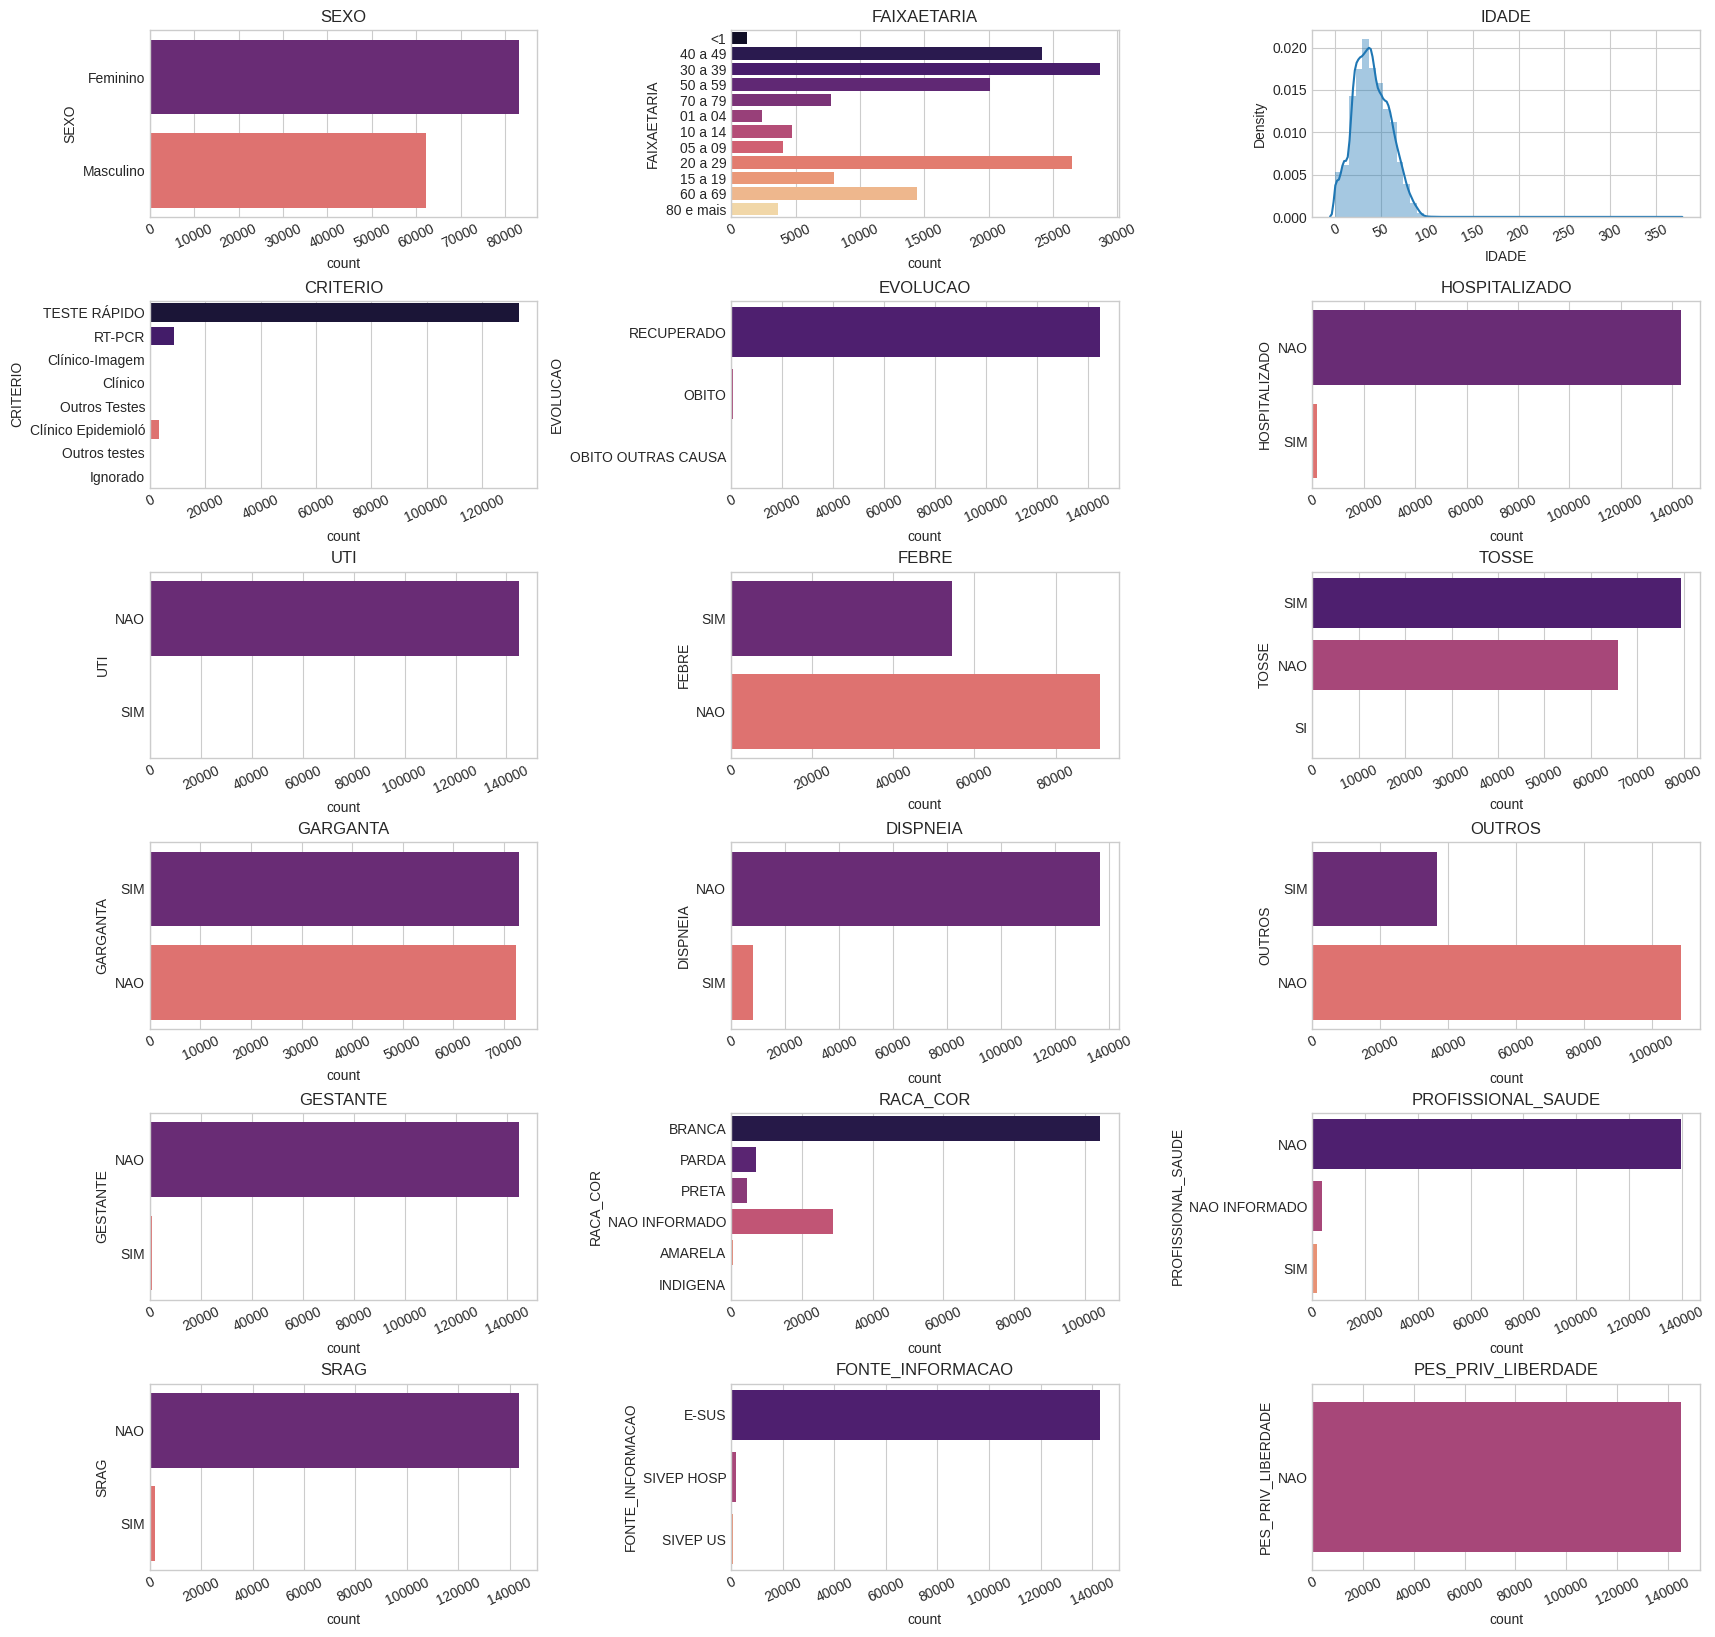

In [15]:
plot_distribution(df.drop(['BAIRRO', 'CONDICOES', 'COD_IBGE', 'MUNICIPIO', 'DATA_SINTOMAS', 
                           'DATA_CONFIRMACAO', 'DATA_EVOLUCAO_ESTIMADA', 'DATA_INCLUSAO',
                           'DATA_INCLUSAO_OBITO', 'PAIS_NASCIMENTO', 'DATA_EVOLUCAO', 'COD_REGIAO_COVID', 
                           'REGIAO_COVID', 'ETNIA_INDIGENA'], axis=1), 
                          cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

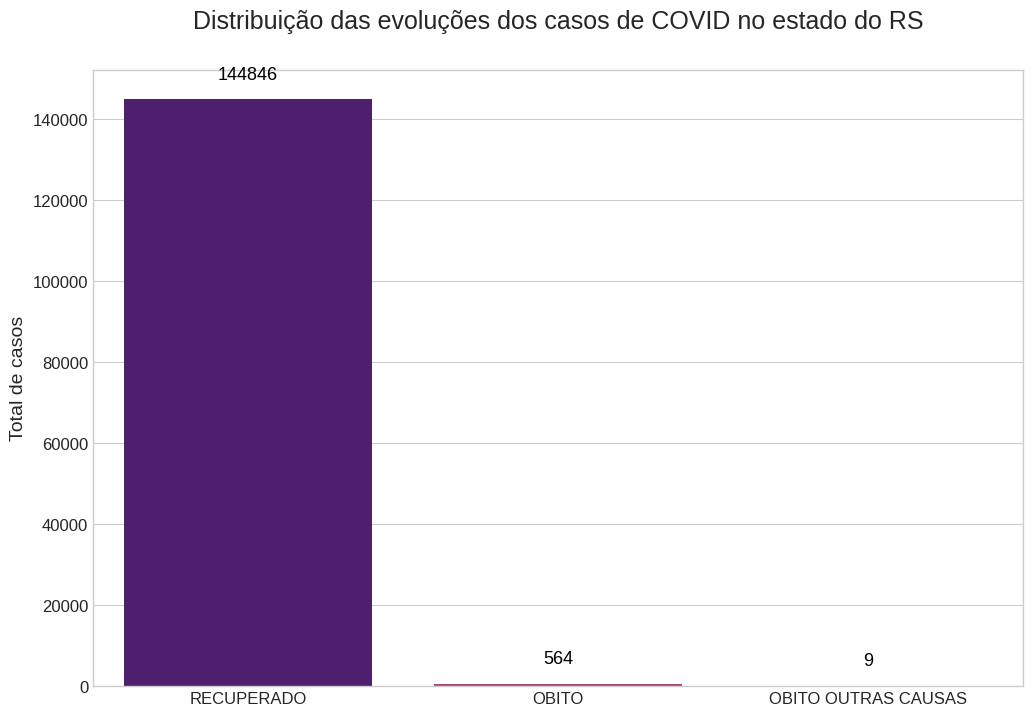

In [16]:
plt.rc('figure', figsize=(12, 8))
ax = sns.countplot(x='EVOLUCAO', data=df, palette='magma')

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 # divide por 2 pra ficar no meio
            _y = p.get_y() + p.get_height() + 5000 # mais 5000 pra n ficar colado na altura da barra
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=13, color='black',) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(ax)

ax.set_title('Distribuição das evoluções dos casos de COVID no estado do RS', fontsize=18, pad=30);
ax.set_ylabel('Total de casos', fontsize=14)
ax.set_xlabel('')

ax.tick_params(axis='both', which='major', labelsize=12)

figure = ax.get_figure()    
figure.savefig("/content/drive/MyDrive/trabalho IA/imgs", dpi=800);

Conclusão da exploração dos dados
Os dados parecem já estar relativamente limpos, com exceção do campo CONDICOES de onde pode-se extrair mais informações. No geral, as informações que nos interessam são preenchidas apenas com "SIM" ou "NÃO", que são os campos de sintomas, como FEBRE (embora existam campos com NAO, sem acento). E o campo EVOLUCAO, que é a nossa variavel preditora. A faixa etária já está bem definida, e pode-se apenas definir a ordem de precedência de cada categoria.

Dentre o conjunto de dados, 99% dos dados são Recuperados, e apenas 0.387% é Óbito por COVID-19. Temos um problema de desbalanceamento, e precisamos tratá-lo posteriormente.



Limpeza

Remoção das colunas que não utilizaremos

Como visto na exploração dos dados, existem algumas colunas que não agregam informação com relação ao nosso objetivo (prever a chance de óbito); portanto removeremos estas colunas, e selecionaremos apenas o conjunto de dados que nos interessa.

Outro ponto, é a coluna de questão racial. Como queremos evitar comportamento racista do nosso modelo, iremos remover essa característica.

In [18]:
df_ = df.drop(columns=['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID',
                 'FONTE_INFORMACAO', 'BAIRRO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE', 
                 'PROFISSIONAL_SAUDE', 'DATA_EVOLUCAO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS', 
                 'DATA_INCLUSAO_OBITO', 'DATA_INCLUSAO',
                 'DATA_EVOLUCAO_ESTIMADA', 'ETNIA_INDIGENA', 'OUTROS'])

In [19]:
df_.columns

Index(['SEXO', 'FAIXAETARIA', 'IDADE', 'CRITERIO', 'EVOLUCAO', 'HOSPITALIZADO',
       'UTI', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'CONDICOES',
       'GESTANTE', 'RACA_COR', 'SRAG'],
      dtype='object')

In [20]:
df.drop(columns=['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID',
                 'FONTE_INFORMACAO', 'BAIRRO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE', 
                 'PROFISSIONAL_SAUDE', 'DATA_EVOLUCAO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS', 
                 'DATA_INCLUSAO_OBITO', 'DATA_INCLUSAO', 'RACA_COR',
                 'DATA_EVOLUCAO_ESTIMADA', 'ETNIA_INDIGENA', 'OUTROS'], inplace=True)

Remoção das colunas que não utilizaremos

Como visto na exploração dos dados, existem algumas colunas que não agregam informação com relação ao nosso objetivo (prever a chance de óbito); portanto removeremos estas colunas, e selecionaremos apenas o conjunto de dados que nos interessa.

Outro ponto, é a coluna de questão racial. Como queremos evitar comportamento racista do nosso modelo, iremos remover essa característica.

In [21]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

CONDICOES        90.178037
DISPNEIA          0.358963
GARGANTA          0.000688
GESTANTE          0.000688
SRAG              0.000688
SEXO              0.000000
FAIXAETARIA       0.000000
IDADE             0.000000
CRITERIO          0.000000
EVOLUCAO          0.000000
HOSPITALIZADO     0.000000
UTI               0.000000
FEBRE             0.000000
TOSSE             0.000000
dtype: float64


In [22]:
df.shape[0]

145419

In [23]:
df_.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [24]:
df.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [25]:
df.isnull().sum()

SEXO                  0
FAIXAETARIA           0
IDADE                 0
CRITERIO              0
EVOLUCAO              0
HOSPITALIZADO         0
UTI                   0
FEBRE                 0
TOSSE                 0
GARGANTA              0
DISPNEIA              0
CONDICOES        130727
GESTANTE              0
SRAG                  0
dtype: int64



Remoção dos registros (linhas) com dados faltantes

Como CONDICOES é um campo extra, este estar com dados faltantes não importa. Portanto, vamos remover os registros que não possuem dados sobre as features já existentes

In [26]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

CONDICOES        90.220639
SEXO              0.000000
FAIXAETARIA       0.000000
IDADE             0.000000
CRITERIO          0.000000
EVOLUCAO          0.000000
HOSPITALIZADO     0.000000
UTI               0.000000
FEBRE             0.000000
TOSSE             0.000000
GARGANTA          0.000000
DISPNEIA          0.000000
GESTANTE          0.000000
SRAG              0.000000
dtype: float64


In [27]:
df_.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [28]:
df.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [29]:
df.isnull().sum()

SEXO                  0
FAIXAETARIA           0
IDADE                 0
CRITERIO              0
EVOLUCAO              0
HOSPITALIZADO         0
UTI                   0
FEBRE                 0
TOSSE                 0
GARGANTA              0
DISPNEIA              0
CONDICOES        130727
GESTANTE              0
SRAG                  0
dtype: int64

In [ ]:
df = df[(df['EVOLUCAO'] == 'OBITO') | (df['EVOLUCAO'] == 'RECUPERADO')]
df.shape[0]

367891

In [30]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)
# registros após a remoção
df.shape[0]

CONDICOES        90.220639
SEXO              0.000000
FAIXAETARIA       0.000000
IDADE             0.000000
CRITERIO          0.000000
EVOLUCAO          0.000000
HOSPITALIZADO     0.000000
UTI               0.000000
FEBRE             0.000000
TOSSE             0.000000
GARGANTA          0.000000
DISPNEIA          0.000000
GESTANTE          0.000000
SRAG              0.000000
dtype: float64


144897

Como queremos prever os casos que evoluíram para óbito por COVID, precisamos dos dados que estão com EVOLUCAO = 'OBITO', e também dos não-óbito 'RECUPERADO'.

Para isso, vamos selecionar a fatia dos dados que possuem evolucao como 'OBITO' ou 'RECUPERADO', apenas.

In [31]:
df = df[(df['EVOLUCAO'] == 'OBITO') | (df['EVOLUCAO'] == 'RECUPERADO')]
df.shape[0]

144888

In [32]:
df_ = df_[(df_['EVOLUCAO'] == 'OBITO') | (df_['EVOLUCAO'] == 'RECUPERADO')]
df_.shape[0]

144888

Os casos que nao possuem raça/cor informados

In [33]:
df_['RACA_COR'].value_counts()

BRANCA           104026
NAO INFORMADO     28867
PARDA              6892
PRETA              4336
AMARELA             594
INDIGENA            173
Name: RACA_COR, dtype: int64

In [34]:
df_ = df_[~(df_['RACA_COR'] == 'NAO INFORMADO')]
df_.shape[0]

116021

Após selecionar os dados com a evolução que precisamos, vamos mudar o nome da variavel e transformar óbito para 1 e recuperado para 0.

In [35]:
df['EVOLUCAO'] = df['EVOLUCAO'].map({'OBITO': 1, 'RECUPERADO': 0})
df_['EVOLUCAO'] = df_['EVOLUCAO'].map({'OBITO': 1, 'RECUPERADO': 0})

Visualização de uma nuvem de palavras
Vamos extrair os dados da coluna CONDICOES, primeiramente visualizando uma nuvem de palavras para entendermos as condições ali presentes.

Para isso, precisamos dos seguintes passos:

* 1. Remoção dos valores faltantes: O
primeiro comando que deve ser executado é a remoção das linhas onde apresentam dados ausentes na coluna 'CONDICOES', já que nesta variável encontra-se os textos utilizados para realizar o wordcloud.
* 2. Transformar em caixa baixa, remover acentos e pontuações
* 3. Junção das strings: Após a remoção das linhas, precisamos unir todas as palavras em uma única string.
* 4. Eliminar stopwords: Para criação de nuvem de palavras, algumas preposições ou palavras devem ser removidas (e.g., do, da, dos, das, no)
* 5. Geração da nuvem de palavras


* 6. Visualização das tuplas mais frequentes: entender as top 50 tuplas que mais aparecem em 'condicoes'

In [36]:
# df que contem raca
df_word_ = df_.dropna(subset=['CONDICOES'], axis=0)

In [37]:
df_word = df.dropna(subset=['CONDICOES'], axis=0)

In [52]:
df_word.dtypes

SEXO             object
FAIXAETARIA      object
IDADE             int64
CRITERIO         object
EVOLUCAO          int64
HOSPITALIZADO    object
UTI              object
FEBRE            object
TOSSE            object
GARGANTA         object
DISPNEIA         object
CONDICOES        object
GESTANTE         object
SRAG             object
dtype: object

In [54]:
for col in df_word.drop(['EVOLUCAO', 'IDADE'], axis=1).columns:
    # removendo acentos
    df_word[col] = df_word[col].apply(unidecode.unidecode) 

# deixando tudo em caixa baixa
df_word['CONDICOES'] = df_word['CONDICOES'].apply(str.lower) 

# removendo virgulas
df_word['CONDICOES'] = df_word['CONDICOES'].str.replace(",", "")

In [55]:
# dataset que contem raca
for col in df_word_.drop(['EVOLUCAO', 'IDADE'], axis=1).columns:
    # removendo acentos
    df_word_[col] = df_word_[col].apply(unidecode.unidecode) 

# deixando tudo em caixa baixa
df_word_['CONDICOES'] = df_word_['CONDICOES'].apply(str.lower) 

# removendo virgulas
df_word_['CONDICOES'] = df_word_['CONDICOES'].str.replace(",", "")

In [56]:
conditions = df_word['CONDICOES'] # pegar apenas as condicoes
all_words_conditions = " ".join(s for s in conditions) # unir tudo em uma string

In [57]:
#raça
conditions_ = df_word['CONDICOES'] # pegar apenas as condicoes
all_words_conditions_ = " ".join(s for s in conditions) # unir tudo em uma string

In [58]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "de", "ao", "os", "ou", 
                  'outros', 'outro', 'outra', 'ate', 'doenca', 'doencas']) # acréscimo de mais stopwords

In [59]:
# raca
stopwords_ = set(STOPWORDS)
stopwords_.update(["da", "meu", "em", "de", "ao", "os", "ou", 
                  'outros', 'outro', 'outra', 'ate', 'doenca', 'doencas']) # acréscimo de mais stopwords

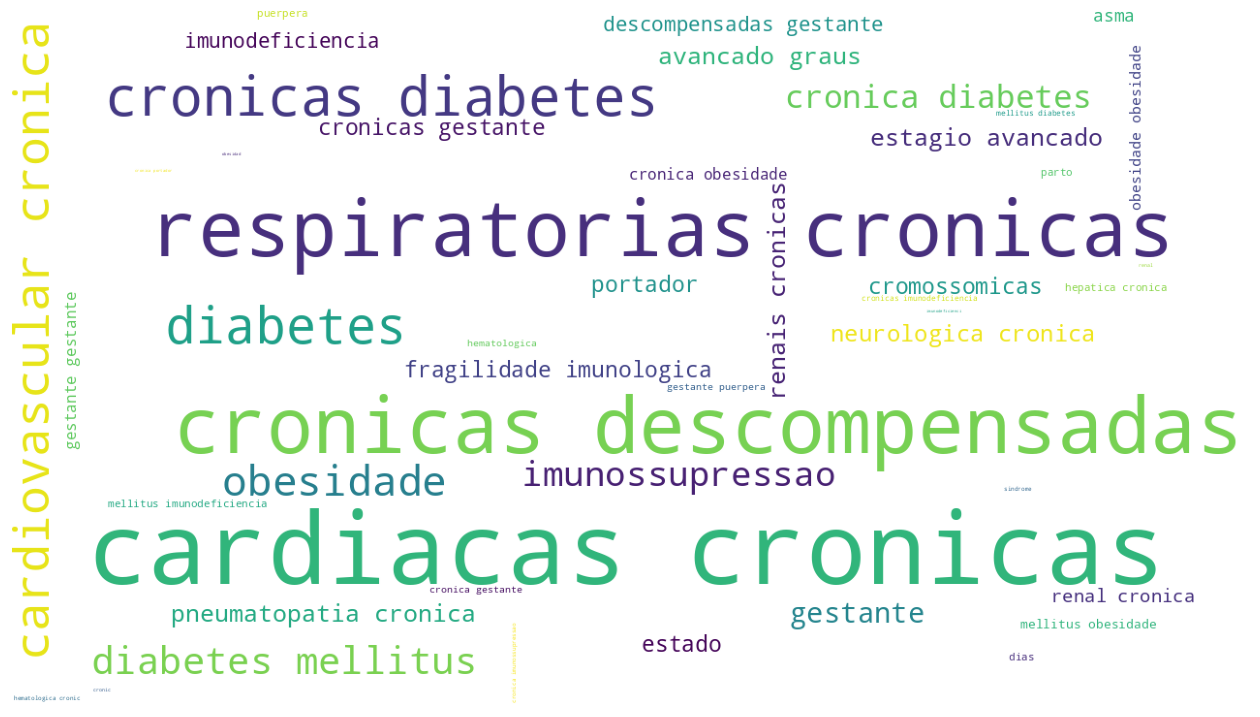

In [61]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1280,                            
                      height=720).generate(all_words_conditions)

fig, ax = plt.subplots(figsize=(16,10))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()

plt.imshow(wordcloud)                 
wordcloud.to_file('/content/drive/MyDrive/trabalho IA/imgs/condicoes.png',);

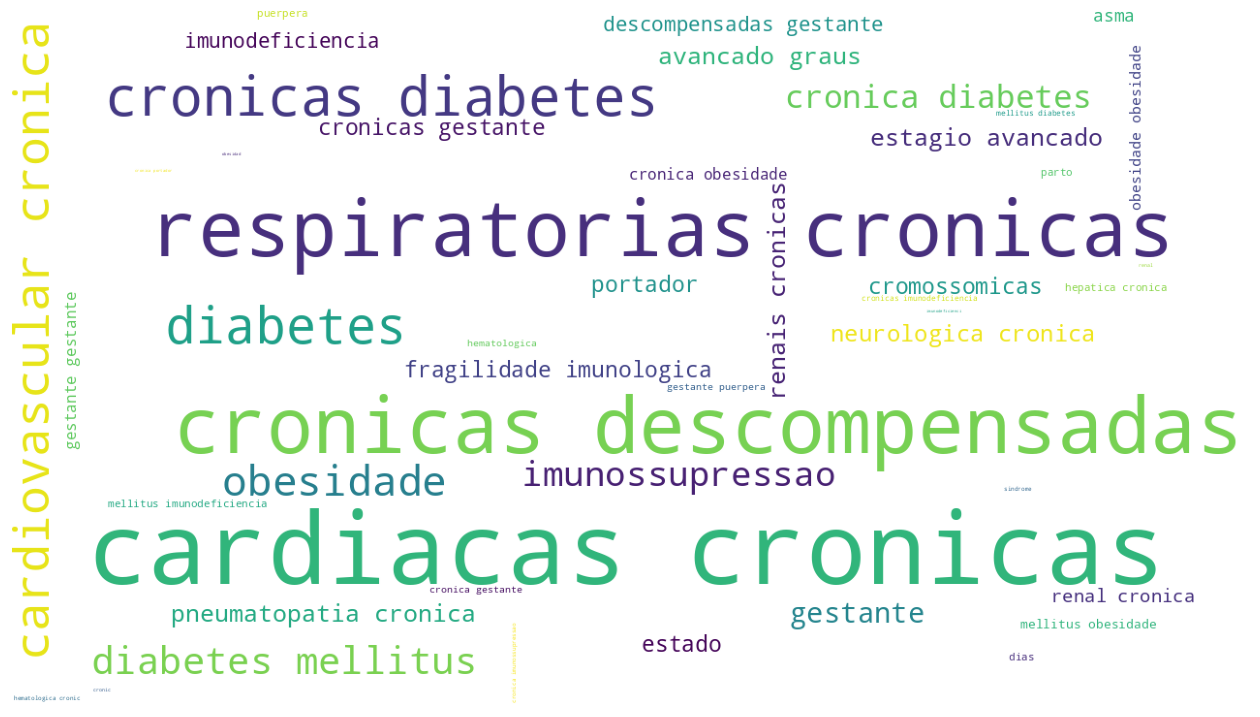

In [62]:
 # raca
wordcloud_ = WordCloud(stopwords=stopwords_,
                      background_color='white', width=1280,                            
                      height=720).generate(all_words_conditions_)

fig, ax = plt.subplots(figsize=(16,10))            
ax.imshow(wordcloud_, interpolation='bilinear')       
ax.set_axis_off()

plt.imshow(wordcloud) 

In [63]:
word_freq = WordCloud().process_text(all_words_conditions)
dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:10])

{'doencas cardiacas': 4314,
 'cardiacas cronicas': 4314,
 'doencas respiratorias': 2403,
 'respiratorias cronicas': 2403,
 'cronicas descompensadas': 2403,
 'cronicas doenca': 2063,
 'outros outros': 2028,
 'outros doenca': 1749,
 'descompensadas doenca': 1431,
 'diabetes doenca': 1144}

Extração de novas features
Com a análise do campo textual, podemos visualizar algumas condições das quais podemos extrair. Devemos nos atentar para sinônimos, como 'doença cardíada' e 'doença cardiovascular', 'mellitus' ou 'diabetes. Outro ponto importante a se notar, são erros de digitação, como 'mellitu' ou 'asm', ou 'pneumopatia' como 'pneumatopatia'

As doenças/condições que extrairemos a partir do campo CONDICOES são:

* CARDIOPATIA = Doença cardiovascular ou doença cardíaca crônicas
* DIABETES = Diabetes ou Mellitu
* DOENCA_RESPIRATORIA = Asma, pneumopatia ou doença pulmonar
* PROBLEMA_RENAL = Problemas renais
* OBESIDADE = Obeso
* DOENCA_CROMOSSOMICA = Sindrome de down

In [64]:
df['CONDICOES'] = df['CONDICOES'].apply(lambda x: str.lower(x) if not isinstance(x, float) else np.nan) # deixando a caixa baixa

In [65]:
# raca
df_['CONDICOES'] = df_['CONDICOES'].apply(lambda x: str.lower(x) if not isinstance(x, float) else np.nan) #

In [66]:
df['CARDIOPATIA'] = ['SIM' if any(string in str(row) for string in ['cardiovascular', 'cardiacas']) else 
                        'NAO' for row in df['CONDICOES']]

df['DIABETES'] = ['SIM' if any(string in str(row) for string in ['diabetes', 'mellitus', 'mellitu']) else 
                  'NAO' for row in df['CONDICOES']]

df['DOENCA_RESPIRATORIA'] = ['SIM' if any(string in str(row) for string in ['respiratorias', 'asma', 'asm', 'pneumopatia', 'pneumatopatia']) else 
                         'NAO' for row in df['CONDICOES']]

df['PROBLEMA_RENAL'] = ['SIM' if any(string in str(row) for string in ['renais', 'renal']) else 
                      'NÃO' for row in df['CONDICOES']]

df['OBESIDADE'] = ['SIM' if any(string in str(row) for string in ['obesidade', 'obesidad']) else 
                   'NAO' for row in df['CONDICOES']]

df['DOENCA_CROMOSSOMICA'] = ['SIM' if any(string in str(row) for string in ['cromossomicas', 'down']) else 
                  'NAO' for row in df['CONDICOES']]

# corrigir o campo de gestante
df['GESTANTE'] = ['SIM' if any(string in str(row) for string in ['gestante']) else 
                  gestante for row, gestante in zip(df['CONDICOES'], df['GESTANTE'])]

In [67]:
# raca
df_['CARDIOPATIA'] = ['SIM' if any(string in str(row) for string in ['cardiovascular', 'cardiacas']) else 
                        'NAO' for row in df_['CONDICOES']]

df_['DIABETES'] = ['SIM' if any(string in str(row) for string in ['diabetes', 'mellitus', 'mellitu']) else 
                  'NAO' for row in df_['CONDICOES']]

df_['DOENCA_RESPIRATORIA'] = ['SIM' if any(string in str(row) for string in ['respiratorias', 'asma', 'asm', 'pneumopatia', 'pneumatopatia']) else 
                         'NAO' for row in df_['CONDICOES']]

df_['PROBLEMA_RENAL'] = ['SIM' if any(string in str(row) for string in ['renais', 'renal']) else 
                      'NÃO' for row in df_['CONDICOES']]

df_['OBESIDADE'] = ['SIM' if any(string in str(row) for string in ['obesidade', 'obesidad']) else 
                   'NAO' for row in df_['CONDICOES']]

df_['DOENCA_CROMOSSOMICA'] = ['SIM' if any(string in str(row) for string in ['cromossomicas', 'down']) else 
                  'NAO' for row in df_['CONDICOES']]

# corrigir o campo de gestante
df_['GESTANTE'] = ['SIM' if any(string in str(row) for string in ['gestante']) else 
                  gestante for row, gestante in zip(df_['CONDICOES'], df_['GESTANTE'])]

In [68]:
# nao precisamos mais das condicoes, nem do hospitalizado
df.drop(columns=['CONDICOES', 'HOSPITALIZADO', 'CRITERIO'], inplace=True) 
df.columns

Index(['SEXO', 'FAIXAETARIA', 'IDADE', 'EVOLUCAO', 'UTI', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'GESTANTE', 'SRAG', 'CARDIOPATIA', 'DIABETES',
       'DOENCA_RESPIRATORIA', 'PROBLEMA_RENAL', 'OBESIDADE',
       'DOENCA_CROMOSSOMICA'],
      dtype='object')

In [69]:
# raca
# nao precisamos mais das condicoes, nem do hospitalizado
df_.drop(columns=['CONDICOES', 'HOSPITALIZADO', 'CRITERIO'], inplace=True) 
df_.columns

Index(['SEXO', 'FAIXAETARIA', 'IDADE', 'EVOLUCAO', 'UTI', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'GESTANTE', 'RACA_COR', 'SRAG', 'CARDIOPATIA',
       'DIABETES', 'DOENCA_RESPIRATORIA', 'PROBLEMA_RENAL', 'OBESIDADE',
       'DOENCA_CROMOSSOMICA'],
      dtype='object')

In [71]:
# não foi aplicado redução de dimensão com o intuito de manter uma boa interpretabilidade
df.to_csv("/content/drive/MyDrive/trabalho IA/covid_2022_cleaned.csv", sep=';', index=False)
df_.to_csv("/content/drive/MyDrive/trabalho IA/covid_2022_cleaned_raca.csv", sep=';', index=False)